In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

In [3]:
data = pd.read_csv('Sentiment.csv')

In [5]:
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,07-08-2015 09:54,6.296970e+17,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,07-08-2015 09:54,6.296970e+17,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,07-08-2015 09:54,6.296970e+17,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,07-08-2015 09:54,6.296970e+17,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,07-08-2015 09:54,6.296970e+17,NaN,Arizona


In [7]:
data = data[['text','sentiment']]                #Keeping only required columns

In [8]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [9]:
train, test = train_test_split(data, test_size=0.1, random_state=42)

In [14]:
train = train[train.sentiment != 'Neutral']  # Removing Neautral Sentiments

In [15]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']


In [43]:
def wordcloud_draw(data,color='black'):
    words =' '.join(data)
    cleaned_word= " ".join([ word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word!='RT' ])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color = color, width=2500, height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(14,14))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

Positive words


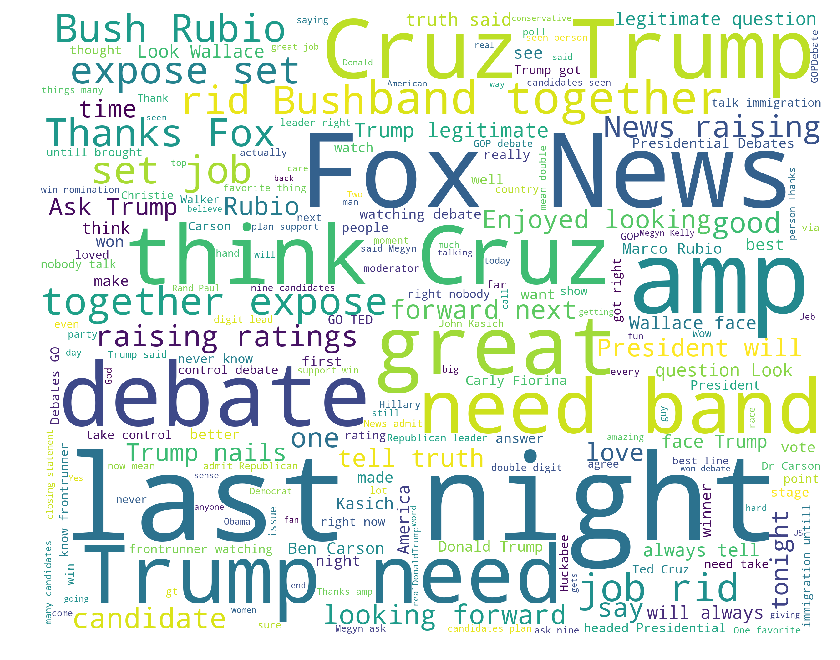

Negative words


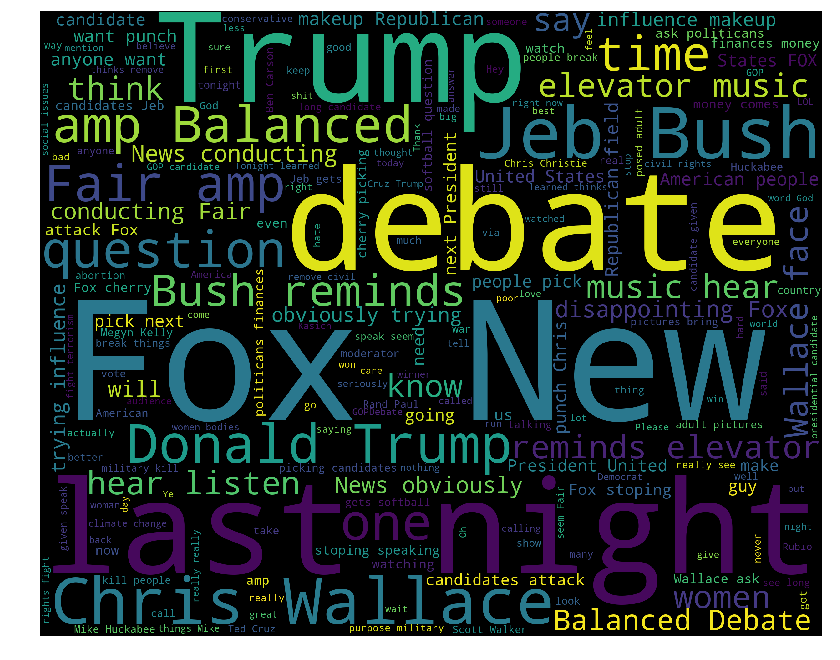

In [47]:
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [48]:
tweets = []

In [49]:
stopwords_set = set(stopwords.words('english'))

In [66]:
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e)>=3]
    words_cleaned = [ word for word in words_filtered if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word!='RT' ]
    words_without_stopwords = [ word for word in words_cleaned if word not in stopwords_set]
    tweets.append((words_without_stopwords,row.sentiment))

In [67]:
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [70]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all


In [76]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

In [86]:
['contains(%s)' % 'word']

['contains(word)']

In [87]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

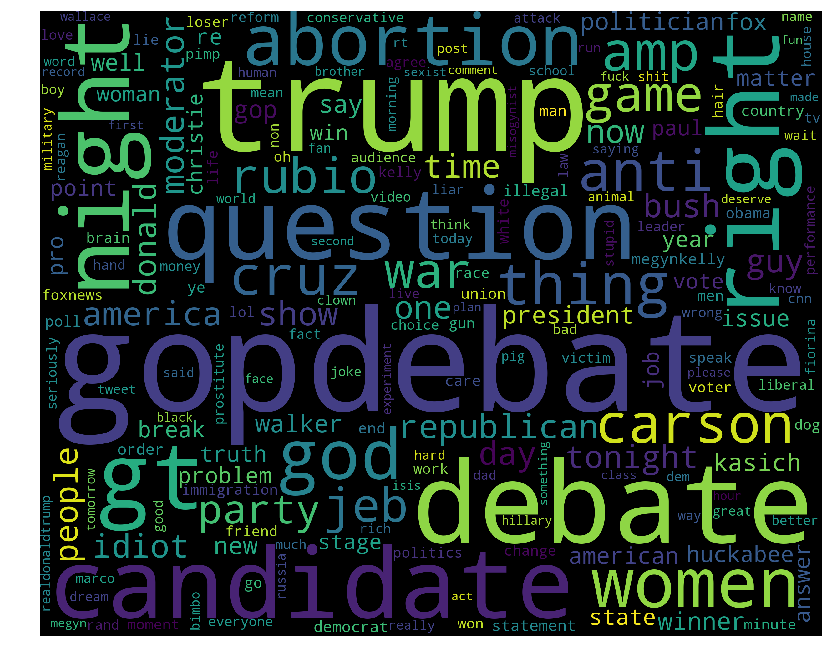

In [90]:
wordcloud_draw(w_features)

In [95]:

training_set = nltk.classify.apply_features(extract_features,tweets)


In [97]:
from subprocess import check_output

In [98]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [99]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt)) 

[Negative]: 846/799 
[Positive]: 234/85 
